## This script reformats datasets so that they're stored in the required format, for the minute part of that format is them being stored as returns

In [49]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 3)



# BITCOIN


In [2]:
bc =pd.read_csv("../datasets/bitcoin.csv").drop("Date", axis=1).dropna()


In [3]:
bc['returns'] = np.log(bc["Close Price"]/bc["Close Price"].shift())

In [4]:
bc.drop("Close Price", axis=1, inplace=True)

In [5]:
bc = bc.dropna()

In [6]:
bc = bc.append(other={"returns": 0}, ignore_index=True)
bc = bc.append(other={"returns": 0}, ignore_index=True)
bc = bc.append(other={"returns": 0}, ignore_index=True)

In [7]:
bc.head()

,returns
0,0.040619
1,0.018526
2,0.031009
3,-0.000616
4,-0.059183


In [8]:
bc.to_csv("../datasets/bc_returns.csv")

# IBM

In [9]:
ibm_prices = pd.read_csv("../datasets/ibm-prices.csv", header=0)#, dtype={"price": float})
ibm_prices.rename(inplace=True,columns=
                  {ibm_prices.columns[0]: "date",
                 ibm_prices.columns[1]: "ibm_prices"})
ibm_prices = ibm_prices.iloc[:-1]
ibm_prices.date = pd.to_datetime(ibm_prices.date)
ibm_prices.ibm_prices = ibm_prices.ibm_prices.astype(float)
ibm_prices.set_index(inplace=True, keys="date")


In [10]:
log_returns = np.log(ibm_prices.ibm_prices / ibm_prices.ibm_prices.shift())

In [11]:
abs_log_returns = np.abs(np.log(ibm_prices.ibm_prices / ibm_prices.ibm_prices.shift()))
abs_log_returns = abs_log_returns.dropna()

In [12]:
log_returns.dropna().reset_index(drop=True).to_csv("../datasets/ibm_returns.csv")

# BITCOIN HIGH FREQUENCY

In [13]:
bitcoin = pd.read_csv("../datasets/hf_bitcoin.csv")
bitcoin = bitcoin.dropna()
bitcoin.Timestamp = bitcoin.Timestamp.astype(pd.Timestamp)

In [14]:
bitcoin['date'] = pd.to_datetime(bitcoin.Timestamp,unit='s')

In [15]:
sampling_rate = "5min"

In [16]:
resampled_series = bitcoin.set_index("date").Close.resample(sampling_rate).mean().interpolate()

In [17]:
log_returns = np.log(resampled_series/resampled_series.shift()).dropna()


In [18]:
log_returns.reset_index(drop=True).to_csv("../datasets/hfbc_returns_" + sampling_rate + ".csv")

## Sampling rate codes

- B	business day frequency
- C	custom business day frequency
- D	calendar day frequency
- W	weekly frequency
- M	month end frequency
- SM	semi-month end frequency (15th and end of month)
- BM	business month end frequency
- CBM	custom business month end frequency
- MS	month start frequency
- SMS	semi-month start frequency (1st and 15th)
- BMS	business month start frequency
- CBMS	custom business month start frequency
- Q	quarter end frequency
- BQ	business quarter end frequency
- QS	quarter start frequency
- BQS	business quarter start frequency
- A, Y	year end frequency
- BA, BY	business year end frequency
- AS, YS	year start frequency
- BAS, BYS	business year start frequency
- BH	business hour frequency
- H	hourly frequency
- T, min	minutely frequency
- S	secondly frequency
- L, ms	milliseconds
- U, us	microseconds
- N	nanoseconds

In [19]:
log_returns.shape

(721921,)

In [20]:
frequency_check = bitcoin.set_index("date").Close.resample(sampling_rate).mean()

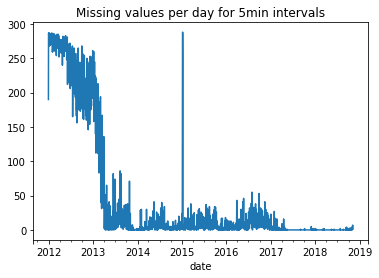

In [24]:
frequency_check[frequency_check.isnull()].apply(lambda x: 1).resample("1D").count().plot()
plt.title("Missing values per day for " + sampling_rate + " intervals")
plt.show()

In [25]:
600*24/5


2880.0

In [32]:
from statsmodels.tsa.stattools import acf

In [35]:
acfunc = acf(np.abs(log_returns), nlags=2880)

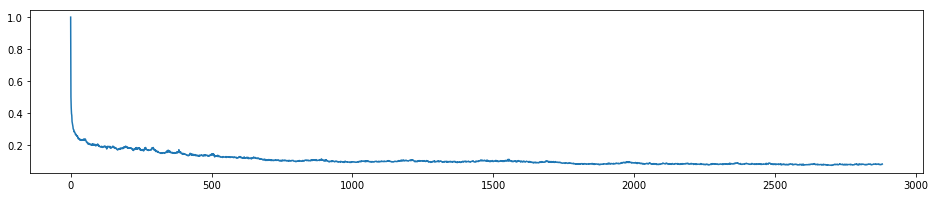

In [50]:
plt.plot(acfunc)

In [38]:
from datetime import datetime

In [40]:
trunc_series = log_returns[log_returns.index > datetime(2017, 6, 1)]


In [41]:
trunc_series.shape

(152063,)

In [44]:
trunc_acfunc = acf(np.abs(trunc_series), nlags=2880)

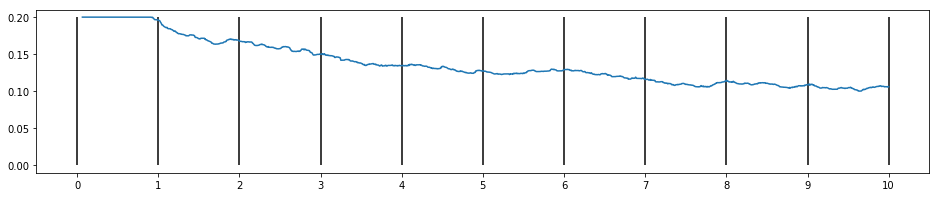

In [65]:
plt.plot(np.linspace(0,10,2881), pd.Series(trunc_acfunc).apply(lambda x: 0.2 if x > 0.2 else x).rolling(window=20).median())
plt.xticks(np.arange(0, 11, step=1))
plt.vlines(np.arange(0, 11, step=1), 0, 0.2)
plt.show()